In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [350]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [351]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [352]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [353]:
train = train.set_index('PassengerId')

In [56]:
test = test.set_index('PassengerId')

In [57]:
train.shape, test.shape

((891, 11), (418, 10))

In [58]:
data = pd.concat([train, test], sort=True)
data

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,NaN,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,NaN,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,NaN,SOTON/O.Q. 3101262


In [59]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [60]:
data.columns = ['Idade','Cabine','Embarque','Tarifa','Nome','PaisFilhos','Classe','Sexo','IrmaoConjuge','Sobreviveu','Bilhete']

In [61]:
sexo = {'male':'homem', 'female':'mulher'}
data['Sexo'] = data['Sexo'].map(sexo)

# Parâmetros

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         1046 non-null   float64
 1   Cabine        295 non-null    object 
 2   Embarque      1307 non-null   object 
 3   Tarifa        1308 non-null   float64
 4   Nome          1309 non-null   object 
 5   PaisFilhos    1309 non-null   int64  
 6   Classe        1309 non-null   int64  
 7   Sexo          1309 non-null   object 
 8   IrmaoConjuge  1309 non-null   int64  
 9   Sobreviveu    891 non-null    float64
 10  Bilhete       1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### Nominais

Sexo, Embarque, Sobreviveu

### Ordinais 

Classe

### Numérico Contínuo

Idade, Tarifa

### Numérico Discreto

PaisFilhos, IrmaoConjuge

### Alfanumérico

Bilhete

In [66]:
data.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmaoConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [67]:
data.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",homem,CA. 2343
freq,6,916,2,843,11


# Dados Incompletos

In [63]:
data.isnull().sum()

Idade            263
Cabine          1014
Embarque           2
Tarifa             1
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaoConjuge       0
Sobreviveu       418
Bilhete            0
dtype: int64

In [64]:
data['Embarque'] = data['Embarque'].fillna(data.Embarque.mode()[0])

In [65]:
data.isnull().sum()

Idade            263
Cabine          1014
Embarque           0
Tarifa             1
Nome               0
PaisFilhos         0
Classe             0
Sexo               0
IrmaoConjuge       0
Sobreviveu       418
Bilhete            0
dtype: int64

# Agrupamentos

In [78]:
data[['Classe','Sobreviveu']].groupby(['Classe']).mean()

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


In [79]:
data[['Sexo','Sobreviveu']].groupby(['Sexo']).mean()

,Sobreviveu
Sexo,
homem,0.188908
mulher,0.742038


In [80]:
data[['IrmaoConjuge','Sobreviveu']].groupby(['IrmaoConjuge']).mean()

,Sobreviveu
IrmaoConjuge,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [81]:
data[['PaisFilhos','Sobreviveu']].groupby(['PaisFilhos']).mean()

,Sobreviveu
PaisFilhos,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000
9,NaN


In [82]:
data[['IrmaoConjuge','PaisFilhos']].corr()

,IrmaoConjuge,PaisFilhos
IrmaoConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


# Visualização de Dados

C:\Users\profg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sobreviveu')

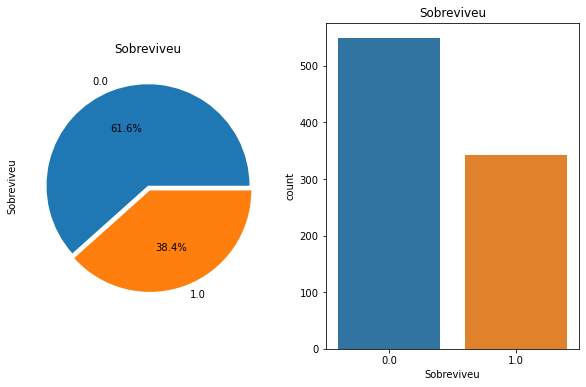

In [101]:
f,ax = plt.subplots(1,2,figsize=(10,6))
data['Sobreviveu'].value_counts().plot.pie(explode=[0,0.05], autopct='%0.1f%%', ax=ax[0])
ax[0].set_title('Sobreviveu')
sns.countplot('Sobreviveu',data=data,ax=ax[1])
ax[1].set_title('Sobreviveu')

In [105]:
data.groupby(['Sexo','Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

C:\Users\profg\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sexo', ylabel='count'>

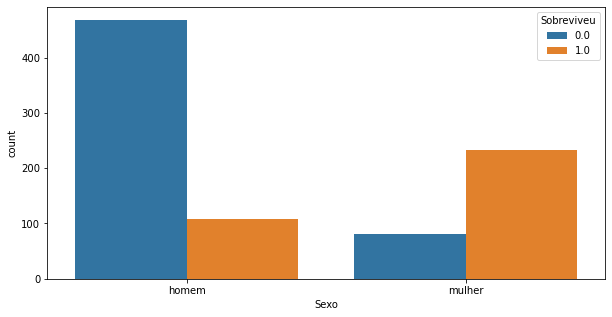

In [108]:
plt.figure(figsize=(10,5))
sns.countplot('Sexo',hue='Sobreviveu',data=data)

In [119]:
data.loc[data['Sexo'] == 'mulher'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaoConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


In [120]:
data.loc[data['Sexo'] == 'homem'].groupby('Sobreviveu').mean()

,Idade,Tarifa,PaisFilhos,Classe,IrmaoConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


In [124]:
pd.crosstab(data['Sobreviveu'], data['Classe'],margins=True).style.background_gradient()

Classe,1,2,3,All
Sobreviveu,,,,
0.000000,80,97,372,549
1.000000,136,87,119,342
All,216,184,491,891


# Remover Cabine

data.isnull().sum()

In [126]:
data = data.drop(['Cabine'], axis=1)

# Engenharia de Recursos

In [141]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [153]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [154]:
lista = ['Miss','Master','Mr','Mrs']

In [157]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in lista else x)

In [158]:
pd.crosstab(data['Titulo'],data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


In [159]:
titulos = {'Master':'Menino','Miss':'Solteira','Mr':'Homem','Mrs':'Esposa','Outros':'Outros'}
data['Titulo'] = data['Titulo'].map(titulos)

# Sobrevivência de Famílias

In [163]:
data['Nome'].str.split(',').str[0]

PassengerId
1              Braund
2             Cumings
3           Heikkinen
4            Futrelle
5               Allen
            ...      
1305          Spector
1306    Oliva y Ocana
1307          Saether
1308             Ware
1309            Peter
Name: Nome, Length: 1309, dtype: object

In [164]:
data['Sobrenome'] = data['Nome'].str.split(',').str[0]

In [167]:
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

### Família Andersson

In [169]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete']].loc[data['Sobrenome'] == 'Andersson']

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
14,0.0,Homem,Andersson,347082
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
147,1.0,Homem,Andersson,350043
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Esposa,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082


In [176]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete','Classe']].loc[data['Sobrenome'] == 'Andersson']\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Classe
PassengerId,,,,,
69,1.0,Solteira,Andersson,3101281,3
120,0.0,Solteira,Andersson,347082,3
542,0.0,Solteira,Andersson,347082,3
543,0.0,Solteira,Andersson,347082,3
611,0.0,Esposa,Andersson,347082,3
814,0.0,Solteira,Andersson,347082,3
851,0.0,Menino,Andersson,347082,3
1106,NaN,Solteira,Andersson,347091,3


### Família Sage

In [175]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete','Classe']].loc[data['Sobrenome'] == 'Sage']\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Classe
PassengerId,,,,,
160,0.0,Menino,Sage,CA. 2343,3
181,0.0,Solteira,Sage,CA. 2343,3
793,0.0,Solteira,Sage,CA. 2343,3
864,0.0,Solteira,Sage,CA. 2343,3
1080,NaN,Solteira,Sage,CA. 2343,3
1252,NaN,Menino,Sage,CA. 2343,3
1257,NaN,Esposa,Sage,CA. 2343,3


### Família Brown

In [177]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete','Classe']].loc[data['Sobrenome'] == 'Brown']\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete,Classe
PassengerId,,,,,
195,1.0,Esposa,Brown,PC 17610,1
346,1.0,Solteira,Brown,248733,2
671,1.0,Esposa,Brown,29750,2
1067,NaN,Solteira,Brown,29750,2
1248,NaN,Esposa,Brown,11769,1


# Criar Dataframe

In [182]:
mulher_crianca = data.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]
mulher_crianca['Titulo'].unique()

array(['Esposa', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Mesmo sobrenome 

In [183]:
data['Sobrenome'].apply(lambda x: mulher_crianca.loc[mulher_crianca.Sobrenome == x]['Sobreviveu'].count())

PassengerId
1       0
2       1
3       1
4       1
5       1
       ..
1305    0
1306    0
1307    0
1308    0
1309    2
Name: Sobrenome, Length: 1309, dtype: int64

In [184]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: mulher_crianca.loc[mulher_crianca.Sobrenome == x]['Sobreviveu'].count())

In [197]:
data[['TamanhoGrupo','Sobrenome','Titulo','Sobreviveu']].sort_values(by='TamanhoGrupo',ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,Homem,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Esposa,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,Homem,1.0
1106,7,Andersson,Solteira,NaN
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
851,7,Andersson,Menino,0.0


In [200]:
for index, _ in data.iterrows():
    if data['Titulo'].at[index] == 'Homem':
        data['TamanhoGrupo'].at[index] = 0

In [201]:
data[['TamanhoGrupo','Sobrenome','Titulo','Sobreviveu']].sort_values(by='TamanhoGrupo',ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
814,7,Andersson,Solteira,0.0
1106,7,Andersson,Solteira,NaN
69,7,Andersson,Solteira,1.0
120,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
542,7,Andersson,Solteira,0.0
611,7,Andersson,Esposa,0.0
851,7,Andersson,Menino,0.0
172,5,Rice,Menino,0.0


# Sobrevivência por família

In [213]:
data['Sobrenome'].apply(lambda x: data[['Titulo','Sobreviveu']].loc[data['Sobrenome']==x].loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')].mean()['Sobreviveu'])

PassengerId
1       NaN
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
1305    NaN
1306    NaN
1307    NaN
1308    NaN
1309    1.0
Name: Sobrenome, Length: 1309, dtype: float64

In [214]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo','Sobreviveu']].loc[data['Sobrenome']==x].loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')].mean()['Sobreviveu'])

In [215]:
data[['SobrevivenciaGrupo','Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,NaN,Homem
2,1.0,Esposa
3,1.0,Solteira
4,1.0,Esposa
5,1.0,Homem
...,...,...
1305,NaN,Homem
1306,NaN,Outros
1307,NaN,Homem


In [216]:
for index, _ in data.iterrows():
    if data['Titulo'].at[index] == 'Homem':
        data['SobrevivenciaGrupo'].at[index] = 0

In [217]:
data[['SobrevivenciaGrupo','Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,0.0,Homem
2,1.0,Esposa
3,1.0,Solteira
4,1.0,Esposa
5,0.0,Homem
...,...,...
1305,0.0,Homem
1306,NaN,Outros
1307,0.0,Homem


In [218]:
data['SobrevivenciaGrupo'] = data['SobrevivenciaGrupo'].fillna(0)

In [220]:
data['SobrevivenciaGrupo'].isnull().sum()

0

# Mortes por Família

In [230]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo'] == 0) & (data['TamanhoGrupo'] > 1)]

,Sobrenome,Titulo
PassengerId,,
8,Palsson,Menino
17,Rice,Menino
19,Vander Planke,Esposa
25,Palsson,Solteira
39,Vander Planke,Solteira
51,Panula,Menino
60,Goodwin,Menino
64,Skoog,Menino
72,Goodwin,Solteira


In [229]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo'] == 0) & (data['TamanhoGrupo'] > 1)]\
.loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

In [239]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo'] == 0) & (data['TamanhoGrupo'] > 1)]\
.loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]['Sobreviveu'].count()

50

In [232]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo'] == 1) & (data['TamanhoGrupo'] > 1)]\
.loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

In [240]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo'] == 1) & (data['TamanhoGrupo'] > 1)]\
.loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]['Sobreviveu'].count()

74

In [237]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo'] > 0) & (data['TamanhoGrupo'] > 1) & (data['SobrevivenciaGrupo'] < 1)]\
.loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

In [241]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo'] > 0) & (data['TamanhoGrupo'] > 1) & (data['SobrevivenciaGrupo'] < 1)]\
.loc[(data['Sexo'] == 'mulher') | (data['Titulo'] == 'Menino')]['Sobreviveu'].count()

18

# Expectativa de vida

In [246]:
data['ExpectativaVida'] = ' '
for idx, _ in data.iterrows():
    if (data['SobrevivenciaGrupo'].at[idx]==0) & (data['TamanhoGrupo'].at[idx]>1):
        data['ExpectativaVida'].at[idx] = 'Morte'
    elif (data['SobrevivenciaGrupo'].at[idx]==1) & (data['TamanhoGrupo'].at[idx]>1):
        data['ExpectativaVida'].at[idx] = 'Vida'
    else:
        data['ExpectativaVida'].at[idx] = 'Desconhecida'

In [247]:
pd.crosstab(data['ExpectativaVida'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaVida,,
Desconhecida,498,268
Morte,50,0
Vida,1,74


# Remover Colunas Desnecessárias

In [248]:
data.isnull().sum()

Idade                 263
Embarque                0
Tarifa                  1
Nome                    0
PaisFilhos              0
Classe                  0
Sexo                    0
IrmaoConjuge            0
Sobreviveu            418
Bilhete                 0
Titulo                  0
Sobrenome               0
TamanhoGrupo            0
SobrevivenciaGrupo      0
ExpectativaVida         0
dtype: int64

In [249]:
data.drop(['Nome','Bilhete','Sobrenome'], axis=1, inplace=True)

# Variáveis Dummies

In [250]:
data.describe(include='O')

,Embarque,Sexo,Titulo,ExpectativaVida
count,1309,1309,1309,1309
unique,3,2,5,3
top,S,homem,Homem,Desconhecida
freq,916,843,757,1159


In [252]:
data = pd.get_dummies(data, columns=['Classe','Embarque','Titulo','ExpectativaVida','Sexo'])

In [256]:
data.shape

(1309, 23)

# Predição da Idade

In [257]:
idade = pd.read_csv('idade_completa.csv')

In [259]:
idade.set_index('IdPassageiro', inplace=True)

In [260]:
idade

,Idade
IdPassageiro,
1,22.000000
2,38.000000
3,26.000000
4,35.000000
5,35.000000
...,...
1300,25.163780
1302,25.163531
1305,29.088798


In [266]:
data = data.drop('Idade', axis=1)

In [267]:
data.head()

,Tarifa,PaisFilhos,IrmaoConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_1,Classe_2,Classe_3,Embarque_C,...,Titulo_Esposa,Titulo_Homem,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaVida_Desconhecida,ExpectativaVida_Morte,ExpectativaVida_Vida,Sexo_homem,Sexo_mulher
1,7.2500,0,1,0.0,0,0.0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,71.2833,0,1,1.0,1,1.0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
3,7.9250,0,0,1.0,1,1.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,53.1000,0,1,1.0,1,1.0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
5,8.0500,0,0,0.0,0,0.0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [268]:
data = pd.concat([data,idade], axis=1)

In [269]:
data.shape

(1309, 23)

In [270]:
data.head()

,Tarifa,PaisFilhos,IrmaoConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_1,Classe_2,Classe_3,Embarque_C,...,Titulo_Homem,Titulo_Menino,Titulo_Outros,Titulo_Solteira,ExpectativaVida_Desconhecida,ExpectativaVida_Morte,ExpectativaVida_Vida,Sexo_homem,Sexo_mulher,Idade
1,7.2500,0,1,0.0,0,0.0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,22.0
2,71.2833,0,1,1.0,1,1.0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,38.0
3,7.9250,0,0,1.0,1,1.0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,26.0
4,53.1000,0,1,1.0,1,1.0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,35.0
5,8.0500,0,0,0.0,0,0.0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,35.0


# Preencher Tarifa Faltante

In [272]:
data['Tarifa'].fillna(data['Tarifa'].mean(), inplace=True)

In [274]:
data.isnull().sum()

Tarifa                            0
PaisFilhos                        0
IrmaoConjuge                      0
Sobreviveu                      418
TamanhoGrupo                      0
SobrevivenciaGrupo                0
Classe_1                          0
Classe_2                          0
Classe_3                          0
Embarque_C                        0
Embarque_Q                        0
Embarque_S                        0
Titulo_Esposa                     0
Titulo_Homem                      0
Titulo_Menino                     0
Titulo_Outros                     0
Titulo_Solteira                   0
ExpectativaVida_Desconhecida      0
ExpectativaVida_Morte             0
ExpectativaVida_Vida              0
Sexo_homem                        0
Sexo_mulher                       0
Idade                             0
dtype: int64

# Criar Faixa Etária

In [275]:
pd.cut(data['Idade'].astype('int'), bins=5)

1        (16.0, 32.0]
2        (32.0, 48.0]
3        (16.0, 32.0]
4        (32.0, 48.0]
5        (32.0, 48.0]
            ...      
1305     (16.0, 32.0]
1306     (32.0, 48.0]
1307     (32.0, 48.0]
1308     (16.0, 32.0]
1309    (-0.08, 16.0]
Name: Idade, Length: 1309, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [276]:
data['FaixaEtaria'] = pd.cut(data['Idade'].astype('int'), bins=5)

In [278]:
pd.crosstab(data['FaixaEtaria'], data['Sobreviveu'])

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


In [279]:
data = pd.get_dummies(data, columns=['FaixaEtaria'])

# Criar Recurso Familiares

In [280]:
data['Familiares'] = data['IrmaoConjuge'] + data['PaisFilhos']

In [282]:
sozinho = data['Familiares'] == 0

In [283]:
data['Sozinho'] = sozinho.map({True:1, False:0})

In [284]:
data['Sozinho']

1       0
2       0
3       1
4       0
5       1
       ..
1305    1
1306    1
1307    1
1308    1
1309    0
Name: Sozinho, Length: 1309, dtype: int64

In [286]:
data.shape

(1309, 30)

# Atualizar Train e Test

In [287]:
train = data.loc[train.index]
train

,Tarifa,PaisFilhos,IrmaoConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_1,Classe_2,Classe_3,Embarque_C,...,Sexo_homem,Sexo_mulher,Idade,"FaixaEtaria_(-0.08, 16.0]","FaixaEtaria_(16.0, 32.0]","FaixaEtaria_(32.0, 48.0]","FaixaEtaria_(48.0, 64.0]","FaixaEtaria_(64.0, 80.0]",Familiares,Sozinho
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,7.2500,0,1,0.0,0,0.0,0,0,1,0,...,1,0,22.000000,0,1,0,0,0,1,0
2,71.2833,0,1,1.0,1,1.0,1,0,0,1,...,0,1,38.000000,0,0,1,0,0,1,0
3,7.9250,0,0,1.0,1,1.0,0,0,1,0,...,0,1,26.000000,0,1,0,0,0,0,1
4,53.1000,0,1,1.0,1,1.0,1,0,0,0,...,0,1,35.000000,0,0,1,0,0,1,0
5,8.0500,0,0,0.0,0,0.0,0,0,1,0,...,1,0,35.000000,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,13.0000,0,0,0.0,0,0.0,0,1,0,0,...,1,0,27.000000,0,1,0,0,0,0,1
888,30.0000,0,0,1.0,2,1.0,1,0,0,0,...,0,1,19.000000,0,1,0,0,0,0,1
889,23.4500,2,1,0.0,1,0.0,0,0,1,0,...,0,1,10.537041,1,0,0,0,0,3,0


In [288]:
test = data.loc[test.index]
test

,Tarifa,PaisFilhos,IrmaoConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,Classe_1,Classe_2,Classe_3,Embarque_C,...,Sexo_homem,Sexo_mulher,Idade,"FaixaEtaria_(-0.08, 16.0]","FaixaEtaria_(16.0, 32.0]","FaixaEtaria_(32.0, 48.0]","FaixaEtaria_(48.0, 64.0]","FaixaEtaria_(64.0, 80.0]",Familiares,Sozinho
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,7.8292,0,0,NaN,0,0.0,0,0,1,0,...,1,0,34.500000,0,0,1,0,0,0,1
893,7.0000,0,1,NaN,0,0.0,0,0,1,0,...,0,1,47.000000,0,0,1,0,0,1,0
894,9.6875,0,0,NaN,0,0.0,0,1,0,0,...,1,0,62.000000,0,0,0,1,0,0,1
895,8.6625,0,0,NaN,0,0.0,0,0,1,0,...,1,0,27.000000,0,1,0,0,0,0,1
896,12.2875,1,1,NaN,1,1.0,0,0,1,0,...,0,1,22.000000,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,8.0500,0,0,NaN,0,0.0,0,0,1,0,...,1,0,29.088798,0,1,0,0,0,0,1
1306,108.9000,0,0,NaN,0,0.0,1,0,0,1,...,0,1,39.000000,0,0,1,0,0,0,1
1307,7.2500,0,0,NaN,0,0.0,0,0,1,0,...,1,0,38.500000,0,0,1,0,0,0,1


In [289]:
test.drop('Sobreviveu', axis=1, inplace=True)

In [290]:
test

,Tarifa,PaisFilhos,IrmaoConjuge,TamanhoGrupo,SobrevivenciaGrupo,Classe_1,Classe_2,Classe_3,Embarque_C,Embarque_Q,...,Sexo_homem,Sexo_mulher,Idade,"FaixaEtaria_(-0.08, 16.0]","FaixaEtaria_(16.0, 32.0]","FaixaEtaria_(32.0, 48.0]","FaixaEtaria_(48.0, 64.0]","FaixaEtaria_(64.0, 80.0]",Familiares,Sozinho
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,7.8292,0,0,0,0.0,0,0,1,0,1,...,1,0,34.500000,0,0,1,0,0,0,1
893,7.0000,0,1,0,0.0,0,0,1,0,0,...,0,1,47.000000,0,0,1,0,0,1,0
894,9.6875,0,0,0,0.0,0,1,0,0,1,...,1,0,62.000000,0,0,0,1,0,0,1
895,8.6625,0,0,0,0.0,0,0,1,0,0,...,1,0,27.000000,0,1,0,0,0,0,1
896,12.2875,1,1,1,1.0,0,0,1,0,0,...,0,1,22.000000,0,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,8.0500,0,0,0,0.0,0,0,1,0,0,...,1,0,29.088798,0,1,0,0,0,0,1
1306,108.9000,0,0,0,0.0,1,0,0,1,0,...,0,1,39.000000,0,0,1,0,0,0,1
1307,7.2500,0,0,0,0.0,0,0,1,0,0,...,1,0,38.500000,0,0,1,0,0,0,1


# Utilizar Train para treinar modelo

In [293]:
X = train.drop('Sobreviveu', axis=1)

In [294]:
y = train['Sobreviveu']

In [295]:
X.shape, y.shape

((891, 29), (891,))

In [296]:
X.columns

Index(['Tarifa', 'PaisFilhos', 'IrmaoConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_1', 'Classe_2', 'Classe_3', 'Embarque_C',
       'Embarque_Q', 'Embarque_S', 'Titulo_Esposa', 'Titulo_Homem',
       'Titulo_Menino', 'Titulo_Outros', 'Titulo_Solteira',
       'ExpectativaVida_Desconhecida', 'ExpectativaVida_Morte',
       'ExpectativaVida_Vida', 'Sexo_homem', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(-0.08, 16.0]', 'FaixaEtaria_(16.0, 32.0]',
       'FaixaEtaria_(32.0, 48.0]', 'FaixaEtaria_(48.0, 64.0]',
       'FaixaEtaria_(64.0, 80.0]', 'Familiares', 'Sozinho'],
      dtype='object')

In [297]:
recursos = ['Tarifa', 'PaisFilhos', 'IrmaoConjuge', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_1', 'Classe_2', 'Classe_3', 'Embarque_C',
       'Embarque_Q', 'Embarque_S', 'Titulo_Esposa', 'Titulo_Homem',
       'Titulo_Menino', 'Titulo_Outros', 'Titulo_Solteira',
       'ExpectativaVida_Desconhecida', 'ExpectativaVida_Morte',
       'ExpectativaVida_Vida', 'Sexo_homem', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(-0.08, 16.0]', 'FaixaEtaria_(16.0, 32.0]',
       'FaixaEtaria_(32.0, 48.0]', 'FaixaEtaria_(48.0, 64.0]',
       'FaixaEtaria_(64.0, 80.0]', 'Familiares', 'Sozinho']

In [298]:
X = X[recursos]

# Divisão train e test

In [299]:
from sklearn.model_selection import train_test_split

Dividir 70% para treinar e 30% para teste

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [357]:
X_train.shape, X_test.shape

((623, 29), (268, 29))

# Machine Learning

In [304]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier)

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Treinar modelo

In [313]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
        
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self, x, y):
        return self.clf.fit(x,y)
    
    def feature_importance(self, x, y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self, x, y):
        return self.clf.score(x,y)

In [315]:
modelos = [{'nome':'logreg','modelo':LogisticRegression},
          {'nome':'etree','modelo':ExtraTreesClassifier},
          {'nome':'gradboost','modelo':GradientBoostingClassifier},
          {'nome':'adaboost','modelo':AdaBoostClassifier},
          {'nome':'SVC','modelo':SVC},
          {'nome':'KNN','modelo':KNeighborsClassifier},
          {'nome':'Perceptron','modelo':Perceptron},
          {'nome':'LinearSVC','modelo':LinearSVC},
          {'nome':'SGD','modelo':SGDClassifier},
          {'nome':'Dtree','modelo':DecisionTreeClassifier},
          {'nome':'Rforest','modelo':RandomForestClassifier}]

In [316]:
resultados = []

for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    #treinar
    x.fit(X_train, y_train)
    #predição
    x_pred = x.predict(X_test)
    #score
    acuracy = x.score(X_test, y_test)
    
    resultados.append({'nome':model['nome'],
                      'score':acuracy,
                      'pred':x_pred})

In [320]:
models = pd.DataFrame(resultados)
models

,nome,score,pred
0,logreg,0.902985,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
1,etree,0.847015,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
2,gradboost,0.895522,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
3,adaboost,0.906716,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
4,SVC,0.727612,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,KNN,0.750000,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,Perceptron,0.746269,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, ..."
7,LinearSVC,0.891791,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
8,SGD,0.850746,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
9,Dtree,0.847015,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


In [322]:
models[['nome','score']].sort_values(by='score', ascending=False)

,nome,score
3,adaboost,0.906716
0,logreg,0.902985
2,gradboost,0.895522
7,LinearSVC,0.891791
10,Rforest,0.876866
8,SGD,0.850746
1,etree,0.847015
9,Dtree,0.847015
5,KNN,0.750000
6,Perceptron,0.746269


In [336]:
ensemble = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                                                                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                                                                    weights='uniform'))])

In [337]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10))])

In [338]:
ensemble.score(X_test, y_test)

0.753731343283582

In [341]:
ensemble_pred = ensemble.predict(test[recursos])

In [359]:
ensemble_pred.shape

(418,)

In [343]:
submissao = pd.DataFrame({
    'PassengerId':test.index,
    'Survived':ensemble_pred
})

In [344]:
submissao.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [345]:
submissao['Survived'] = submissao['Survived'].astype('int')

In [346]:
submissao

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [347]:
submissao.to_csv('ensemble.csv', index=False)